<a href="https://colab.research.google.com/github/salmaelyagoubi/Audio-Signal-Processing-for-Bird-Sound-Isolation/blob/main/Audio_Signal_Processing_for_Bird_Sound_Isolation_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Signal Processing for Bird Sound Isolation  and report

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


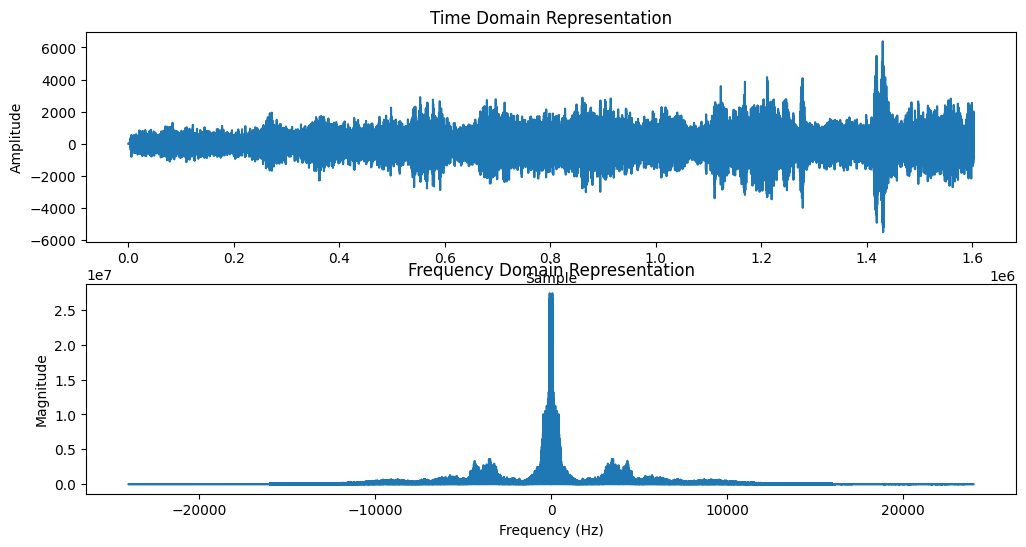

Nyquist Frequency: 24000.0 Hz


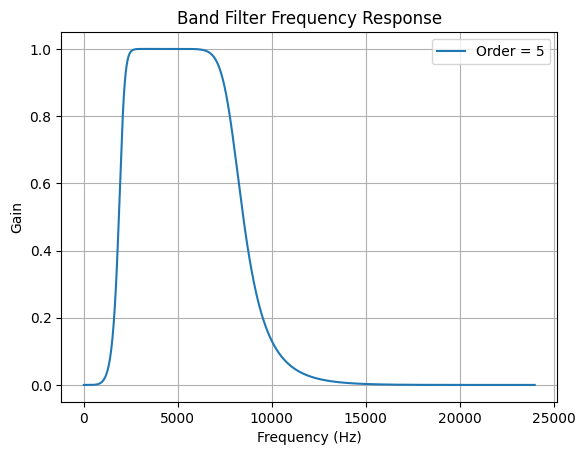

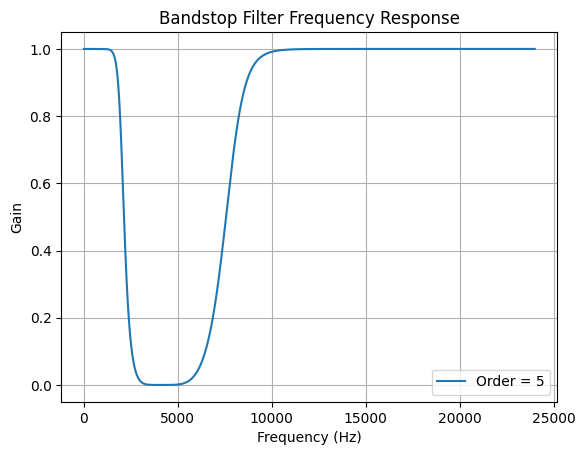

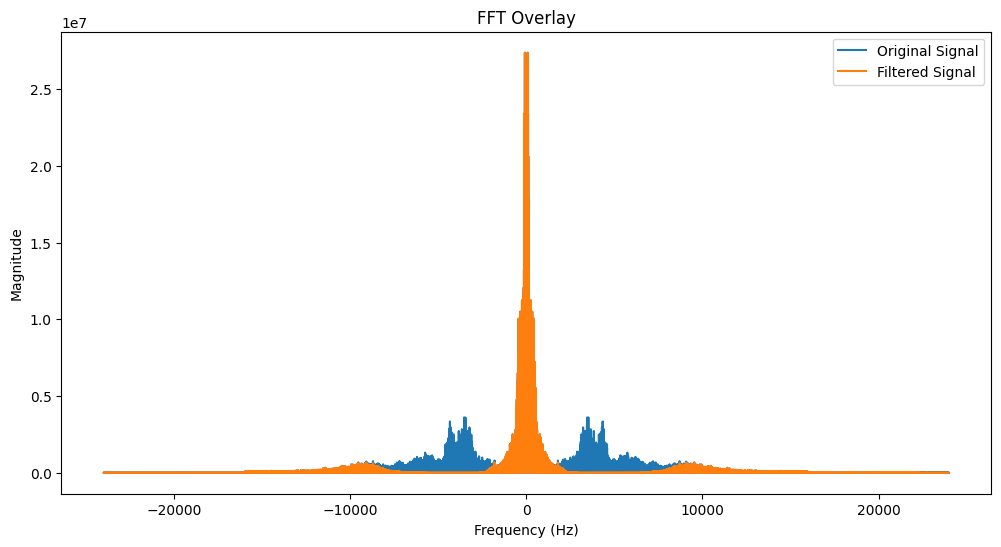

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt, freqz

# Load the audio file from Google Drive
audio_file_path = '/content/drive/MyDrive/Bird_Plane_sound.wav'
sampling_rate, audio_signal = wavfile.read(audio_file_path)

# Time and Frequency Representations
def plot_time_frequency(audio_signal, sampling_rate):
    # Time domain
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(audio_signal)
    plt.title('Time Domain Representation')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Frequency domain
    freqs = fftfreq(len(audio_signal), 1/sampling_rate)
    fft_values = np.abs(fft(audio_signal))

    plt.subplot(2, 1, 2)
    plt.plot(freqs, fft_values)
    plt.title('Frequency Domain Representation')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

plot_time_frequency(audio_signal, sampling_rate)

# Nyquist Frequency
nyquist_freq = sampling_rate / 2
print(f'Nyquist Frequency: {nyquist_freq} Hz')

# Define Refined Bandpass Filter for Bird Sounds
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

bird_sounds = bandpass_filter(audio_signal, 2000, 8000, sampling_rate, order=5)

# Save the Filtered Bird Sounds to Google Drive
bird_sounds_file_path = '/content/drive/MyDrive/filtered_bird_sounds_refined.wav'
wavfile.write(bird_sounds_file_path, sampling_rate, bird_sounds.astype(np.int16))

# the Frequency Response of the Bandpass Filter
def plot_filter_response(lowcut, highcut, fs, order=5, filter_type='band'):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype=filter_type)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=f"Order = {order}")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.title(f'{filter_type.capitalize()} Filter Frequency Response')
    plt.legend(loc='best')

plt.figure()
plot_filter_response(2000, 8000, sampling_rate, order=5, filter_type='band')
plt.show()

# Defined Bandstop Filter to Remove Bird Sounds and Keep Plane Sounds
def bandstop_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    y = filtfilt(b, a, data)
    return y

plane_sounds = bandstop_filter(audio_signal, 2000, 8000, sampling_rate, order=5)

# Save the Filtered Plane Sounds to Google Drive
plane_sounds_file_path = '/content/drive/MyDrive/filtered_plane_sounds_refined.wav'
wavfile.write(plane_sounds_file_path, sampling_rate, plane_sounds.astype(np.int16))

# Plot the Frequency Response of the Bandstop Filter
plt.figure()
plot_filter_response(2000, 8000, sampling_rate, order=5, filter_type='bandstop')
plt.show()

# Overlay Filter Response on Signal FFT
def overlay_filter_response(signal, filtered_signal, sampling_rate):
    freqs = fftfreq(len(signal), 1/sampling_rate)
    fft_values = np.abs(fft(signal))
    filtered_fft_values = np.abs(fft(filtered_signal))

    plt.figure(figsize=(12, 6))
    plt.plot(freqs, fft_values, label='Original Signal')
    plt.plot(freqs, filtered_fft_values, label='Filtered Signal')
    plt.title('FFT Overlay')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

overlay_filter_response(audio_signal, plane_sounds, sampling_rate)